<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/220718_Tesla_Stock_Price_Prediction_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link and I use it to practice my skills

https://thecleverprogrammer.com/2021/03/27/tesla-stock-price-prediction-with-machine-learning/

https://medium.com/coders-camp/180-data-science-and-machine-learning-projects-with-python-6191bc7b9db9

In [3]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 6.4 MB 50.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet
import yfinance as yf
from datetime import date, timedelta

In [12]:
end_date = date.today() - timedelta(2)
end_date = end_date.strftime('%Y-%m-%d')
end_date

'2022-07-16'

In [13]:
start_date = date.today() - timedelta(365*5)
start_date = start_date.strftime('%Y-%m-%d')
start_date

'2017-07-19'

In [14]:
data = yf.download('TSLA', start=start_date, end=end_date, progress=True)

[*********************100%***********************]  1 of 1 completed


In [15]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-07-19,65.646004,66.330002,64.643997,65.052002,65.052002,31785000
2017-07-20,65.379997,66.043999,64.839996,65.984001,65.984001,25831000
2017-07-21,65.891998,66.251999,65.160004,65.680000,65.680000,24508000
2017-07-24,66.047997,68.680000,66.001999,68.503998,68.503998,43185500
2017-07-25,69.000000,69.120003,66.830002,67.919998,67.919998,34946000


In [16]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-11,756.309998,759.190002,700.880005,703.030029,703.030029,33080400
2022-07-12,710.539978,719.320007,685.109985,699.210022,699.210022,29310300
2022-07-13,676.500000,726.179993,675.099976,711.119995,711.119995,32651500
2022-07-14,704.690002,715.960022,688.000000,714.940002,714.940002,26185800
2022-07-15,720.000000,730.869995,710.669983,720.200012,720.200012,23165500


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2017-07-19 to 2022-07-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1257 non-null   float64
 1   High       1257 non-null   float64
 2   Low        1257 non-null   float64
 3   Close      1257 non-null   float64
 4   Adj Close  1257 non-null   float64
 5   Volume     1257 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.7 KB


In [18]:
data.reset_index(drop=False, inplace=True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-07-19,65.646004,66.330002,64.643997,65.052002,65.052002,31785000
1,2017-07-20,65.379997,66.043999,64.839996,65.984001,65.984001,25831000
2,2017-07-21,65.891998,66.251999,65.160004,65.680000,65.680000,24508000
3,2017-07-24,66.047997,68.680000,66.001999,68.503998,68.503998,43185500
4,2017-07-25,69.000000,69.120003,66.830002,67.919998,67.919998,34946000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1257 non-null   datetime64[ns]
 1   Open       1257 non-null   float64       
 2   High       1257 non-null   float64       
 3   Low        1257 non-null   float64       
 4   Close      1257 non-null   float64       
 5   Adj Close  1257 non-null   float64       
 6   Volume     1257 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


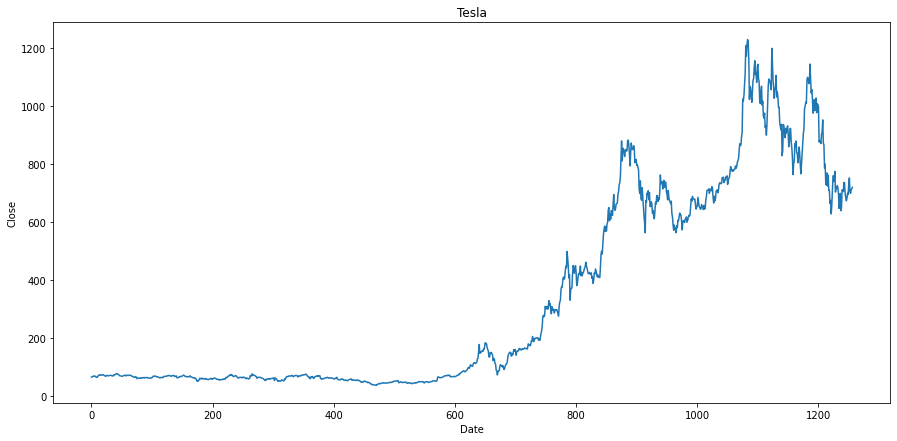

In [30]:
plt.figure(figsize=(15,7))
x = data['Date']
ax = data['Close'].plot(title='Tesla')
ax.set_ylabel('Close')
ax.set_xlabel('Date')
plt.show()

In [31]:
df = data[['Date', 'Close']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1257 non-null   datetime64[ns]
 1   Close   1257 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.8 KB


In [32]:
df.columns = ['ds', 'y']

In [33]:
df.head()

,ds,y
0,2017-07-19,65.052002
1,2017-07-20,65.984001
2,2017-07-21,65.680000
3,2017-07-24,68.503998
4,2017-07-25,67.919998


In [34]:
model = Prophet()
model.fit(df)
predict = model.make_future_dataframe(periods=365)
forecast = model.predict(predict)
forecast.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1617,2023-07-11,1075.670254,880.801504,1150.717428,986.379232,1176.980971,-62.592663,-62.592663,-62.592663,0.635021,0.635021,0.635021,-63.227684,-63.227684,-63.227684,0.0,0.0,0.0,1013.077591
1618,2023-07-12,1076.068744,867.287686,1156.142474,986.441310,1177.922546,-60.031441,-60.031441,-60.031441,0.698005,0.698005,0.698005,-60.729446,-60.729446,-60.729446,0.0,0.0,0.0,1016.037303
1619,2023-07-13,1076.467235,892.936972,1149.688440,986.392881,1178.864121,-59.838338,-59.838338,-59.838338,-1.543627,-1.543627,-1.543627,-58.294711,-58.294711,-58.294711,0.0,0.0,0.0,1016.628896
1620,2023-07-14,1076.865725,885.824345,1156.007798,986.461037,1179.755444,-58.607375,-58.607375,-58.607375,-2.662569,-2.662569,-2.662569,-55.944807,-55.944807,-55.944807,0.0,0.0,0.0,1018.258350
1621,2023-07-15,1077.264216,882.994598,1167.922049,986.534140,1180.411309,-53.459252,-53.459252,-53.459252,0.238507,0.238507,0.238507,-53.697759,-53.697759,-53.697759,0.0,0.0,0.0,1023.804964


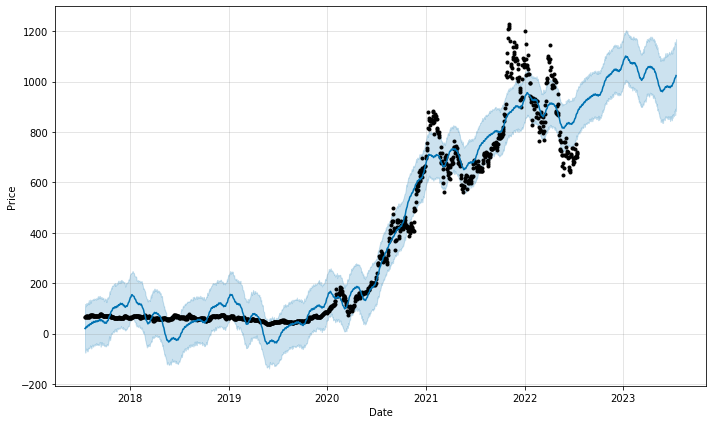

In [35]:
forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
graph = model.plot(forecast, xlabel='Date', ylabel='Price')